In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import pickle
import os

In [2]:
n_md = 120
n_ml = 1
n_aggregators = 10
fn = glob.glob("re.session*.csv")[0]
#fn1 = f'pf{n_md}{ex}.csv'
sdir = f'./'
print(fn,sdir)

re.session.lassen709.yakushin.018809.0002.csv ./


# Timing

In [3]:
pf = pd.read_csv(fn)

In [4]:
pf

,Unnamed: 0,label,start,gps,date,file,line,unit,time
0,0,molecular_dynamics_stage,1,1625159349,Thu Jul 1 10:09:09 2021,run_openmm.py,267,11,1.155584e+06
1,1,molecular_dynamics_SimulationContext,1,1625159349,Thu Jul 1 10:09:09 2021,run_openmm.py,207,11,1.155584e+06
2,2,molecular_dynamics_SimulationContext,-1,1625159349,Thu Jul 1 10:09:09 2021,run_openmm.py,208,11,1.155584e+06
3,3,molecular_dynamics_configure_simulation,1,1625159349,Thu Jul 1 10:09:09 2021,run_openmm.py,211,11,1.155584e+06
4,4,molecular_dynamics_configure_simulation,-1,1625159361,Thu Jul 1 10:09:21 2021,run_openmm.py,219,11,1.155596e+06
...,...,...,...,...,...,...,...,...,...
327511,327511,molecular_dynamics_step,1,1625201093,Thu Jul 1 21:44:53 2021,run_openmm.py,236,4,1.197334e+06
327512,327512,molecular_dynamics_step,-1,1625201688,Thu Jul 1 21:54:48 2021,run_openmm.py,237,4,1.197930e+06
327513,327513,molecular_dynamics_step,1,1625201689,Thu Jul 1 21:54:49 2021,run_openmm.py,236,4,1.197930e+06
327514,327514,molecular_dynamics_step,-1,1625202283,Thu Jul 1 22:04:43 2021,run_openmm.py,237,4,1.198524e+06


In [5]:
if(os.path.exists('pfd.pickle')):
    print("Skip the next two cells, they take forever")
    with open('pfd.pickle','rb') as f:
        pfd = pickle.load(f)
    pfd

Skip the next two cells, they take forever


In [6]:
pfu = {}
pfd = {}

for u in pf['unit'].unique():
    #print(f'u={u}')
    tmp = pf[pf.unit == u].reset_index()
    pfu[u] = {}
    pfd[u] = {}
    for l in tmp.label.unique():
        pfu[u][l] = tmp[tmp.label == l].reset_index()
        
        starts = []
        ends = []
        durations = []
        
        starts1 = []
        ends1 = []
        durations1 = []

        units = []
        labels = []
        times = []
        
        for i in range(0,len(pfu[u][l])//2*2 - 2,2):
            start = pfu[u][l].gps[i]
            end = pfu[u][l].gps[i+1]
            start1 = pfu[u][l].time[i]
            end1 = pfu[u][l].time[i+1]
            duration = end - start
            duration1 = end1 - start1
            unit = pfu[u][l].unit[i]
            label = pfu[u][l].label[i]
            starts.append(start)
            ends.append(end)
            durations.append(duration)
            starts1.append(start1)
            ends1.append(end1)
            durations1.append(duration1)
            units.append(unit)
            labels.append(label)
        pfd[u][l] = pd.DataFrame(columns=["start","end","duration","start1","end1","duration1", "unit","label"])
        pfd[u][l].start = starts
        pfd[u][l].end = ends
        pfd[u][l].duration = durations
        pfd[u][l].start1 = starts1
        pfd[u][l].end1 = ends1
        pfd[u][l].duration1 = durations1        
        pfd[u][l].unit = units
        pfd[u][l].label = labels

In [7]:
pfu[131].keys()

dict_keys(['wait_for_input', 'wait_for_model', 'outlier_search_iteration', 'outlier_read', 'outlier_predict', 'outlier_cluster', 'outlier_write', 'outlier_db', 'outlier_publish'])

In [8]:
with open('pfd.pickle', 'wb') as f:
    pickle.dump(pfd, f)

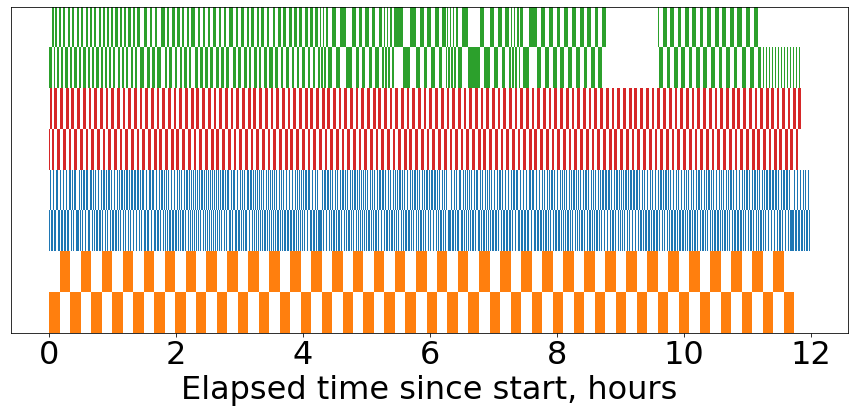

In [9]:
plt.rcParams.update({'font.size': 32})

nnn=n_md
offset=0

import matplotlib.pyplot as plt 
fig, gnt = plt.subplots(figsize=(15, 6)) 
#ddd = 4 #-4.5
#gnt.text(ddd,7,'outlier search')
#gnt.text(ddd,5,'machine learning')
#gnt.text(ddd,3,'aggregation')
#gnt.text(ddd,1,'simulation')
gnt.get_yaxis().set_visible(False)

gnt.set_xlabel('Elapsed time since start, hours') 
# gnt.set_ylabel('task')

gnt.set_ylim([0, 8])

#gnt.grid(True)

pfd[0+offset]['molecular_dynamics_step'].start

sh = 0
h=1


for i in range(offset,offset+1):
    z = pfd[i]['molecular_dynamics_step']
    zz = list(zip((z.start - z.start.min())/3600, z.duration/3600))

    zz1 = zz[0:len(zz):2]
    gnt.broken_barh(zz1, (sh, h), facecolors =('tab:orange'), label="simulation")

    sh += h    
    
    zz1 = zz[1:len(zz):2]
    gnt.broken_barh(zz1, (sh, h), facecolors =('tab:orange'))

    sh += h    
for i in range(1):
    z = pfd[n_md+i+offset]['aggregator_iteration']
    zz = list(zip((z.start - z.start.min())/3600, z.duration/3600))

    zz1 = zz[0:len(zz):2]
    gnt.broken_barh(zz1, (sh, h), facecolors ='tab:blue', label="aggregation")

    sh += h

    zz1 = zz[1:len(zz):2]
    gnt.broken_barh(zz1, (sh, h), facecolors ='tab:blue')

    sh += h


for i in range(1):
    z = pfd[n_md+n_aggregators+i+offset]['ml_train']
    zz = list(zip((z.start - z.start.min())/3600, z.duration/3600))

    zz1 = zz[0:len(zz):2]
    gnt.broken_barh(zz1, (sh, h), facecolors ='tab:red', label="CVAE training")

    sh += h

    zz1 = zz[1:len(zz):2]
    gnt.broken_barh(zz1, (sh, h), facecolors ='tab:red')

    sh += h

z = pfd[n_md + n_aggregators + n_ml +offset]['outlier_search_iteration']
zz = list(zip((z.start - z.start.min())/3600, z.duration/3600))

zz1 = zz[0:len(zz):2]
gnt.broken_barh(zz1, (sh, h), facecolors ='tab:green', label="outlier search")

sh += h

zz1 = zz[1:len(zz):2]
gnt.broken_barh(zz1, (sh, h), facecolors ='tab:green')

#gnt.legend()

plt.savefig("gantt2.png", dpi=600, bbox_inches='tight')